In [1]:
import glob
import os, time
import itertools
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cycler import cycler
from datetime import datetime, timedelta

from scipy.stats import norm
from scipy.optimize import curve_fit #we could import more, but this is what we need
from scipy.stats import linregress

from misc_process import *

%matplotlib inline

In [2]:
'''
Get paths to corresponsing folders
'''

# get the path to the project's main directory (e.g., Project051)
BASE_DIR_PATH = os.path.dirname(os.path.abspath(os.getcwd()))

# ------------------------- data folder -----------------------

# get the path to the folder containing raw data
DATA_DIR_PATH = os.path.join(BASE_DIR_PATH, 'data', '')

# get the path to the folder containing UV-Vis-NIR raw data
DATA_UV_DIR_PATH = os.path.join(BASE_DIR_PATH, 'data', 'UV-Vis-NIR','2023-07-05-aunr-dna2-freezethaw-04072023', '')

# ------------------------- output folder -----------------------

# # get the path to the folder with generated figures
RESULT_DIR_PATH = os.path.join(BASE_DIR_PATH, 'results', 'figs', '')
RESULT_DIR_PATH_CSV = os.path.join(BASE_DIR_PATH, 'results', 'csv', '')
RESULT_DIR_PATH_SI = os.path.join(BASE_DIR_PATH, 'results', 'figs', 'si_figs', 'png', '')

'''
Import data from the folder
'''

#================ import data =========================#

# import file using read_csv function in pandas
df = pd.read_csv(DATA_UV_DIR_PATH+'salt_dna_opt.csv', skiprows=1, index_col= 'Wavelength (nm)')
#df

,Abs,Wavelength (nm).1,Abs.1,Wavelength (nm).2,Abs.2,Wavelength (nm).3,Abs.3,Wavelength (nm).4,Abs.4,Wavelength (nm).5,...,Wavelength (nm).8,Abs.8,Wavelength (nm).9,Abs.9,Wavelength (nm).10,Abs.10,Wavelength (nm).11,Abs.11,Wavelength (nm).12,Abs.12
Wavelength (nm),,,,,,,,,,,,,,,,,,,,,
1100,0.021336,1100,0.013839,1100,0.009279,1100,0.012555,1100,0.008573,1100,...,1100,0.010446,1100,0.064344,1100,0.016862,1100,0.036302,1100,0.018960
1099,0.022374,1099,0.014718,1099,0.013274,1099,0.011717,1099,0.011370,1099,...,1099,0.009721,1099,0.067130,1099,0.018637,1099,0.033381,1099,0.023682
1098,0.024961,1098,0.016708,1098,0.014549,1098,0.011888,1098,0.009673,1098,...,1098,0.015521,1098,0.068313,1098,0.020689,1098,0.036205,1098,0.020536
1097,0.023167,1097,0.017894,1097,0.009326,1097,0.014191,1097,0.012489,1097,...,1097,0.014213,1097,0.069220,1097,0.017470,1097,0.035062,1097,0.021254
1096,0.025268,1096,0.016390,1096,0.014540,1096,0.011289,1096,0.012181,1096,...,1096,0.015006,1096,0.071243,1096,0.017517,1096,0.037720,1096,0.022497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0.478246,304,0.427790,304,0.407819,304,0.405958,304,0.387321,304,...,304,0.277350,304,0.195409,304,0.246020,304,0.264962,304,0.246993
303,0.480835,303,0.429722,303,0.412983,303,0.414557,303,0.395485,303,...,303,0.284064,303,0.201216,303,0.252311,303,0.271295,303,0.253017
302,0.483054,302,0.431586,302,0.418106,302,0.422881,302,0.403428,302,...,302,0.291565,302,0.208015,302,0.258727,302,0.277740,302,0.259664


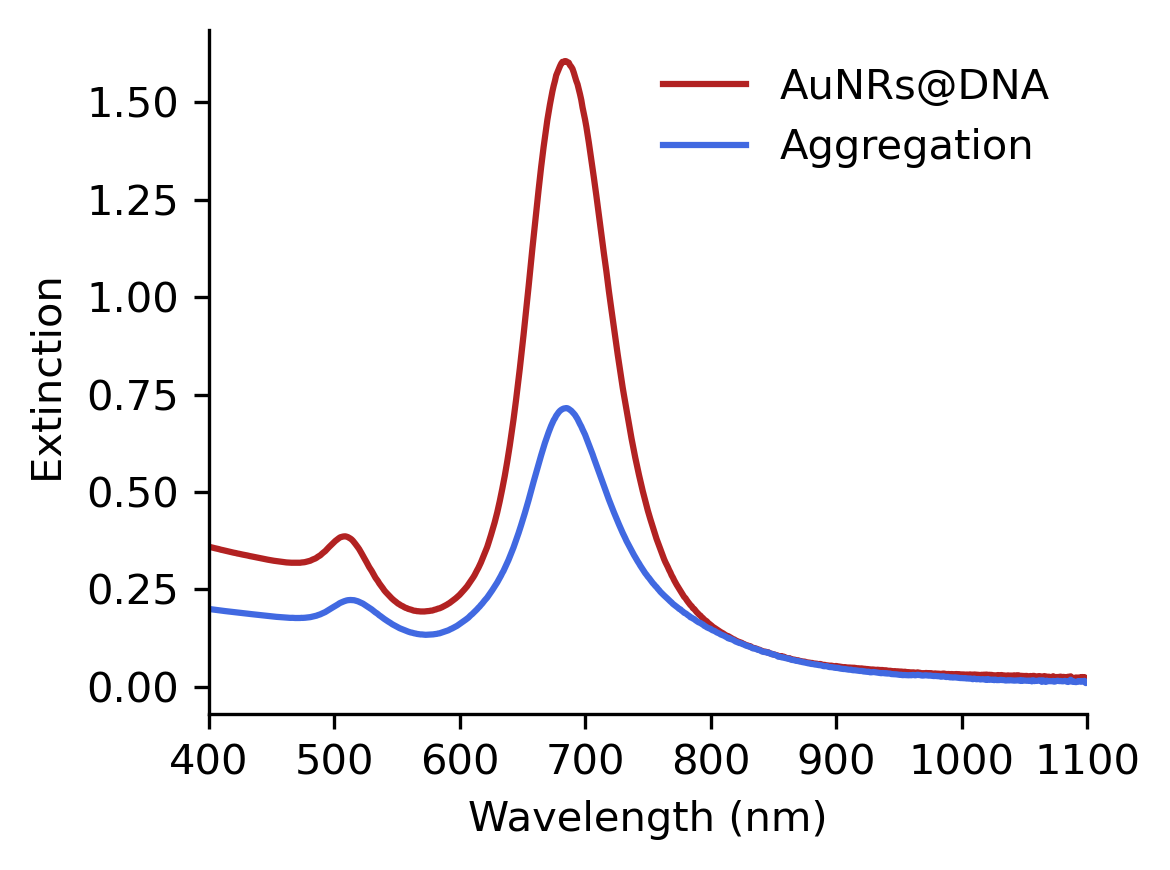

In [24]:
#================ plot data showing aggregation ===========================#

fig = plt.figure(figsize=(4,3), dpi=300) # generate a figure

init = df['Abs.7']

ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one
    
ax.plot(df['Abs'], color = 'firebrick', label = 'AuNRs@DNA')                           # plot data    
ax.plot(df['Abs.8'], color = 'royalblue', label = 'Aggregation')                           # plot data 
    
ax.set_xlim([400,1100])                    # set wavelength limit
#ax.set_ylim([0,0.8])                       # set absorbance limit
ax.set_xlabel(r'Wavelength (nm)')          # set axis label
ax.set_ylabel(r'Extinction ')              # set axis label
ax.legend(frameon = False, loc = 'upper right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()  
fig.savefig(RESULT_DIR_PATH_SI + 'si_aunr-aggregation.png', transparent = True, bbox_inches = 'tight')